# <center> CS 178: Machine Learning &amp; Data Mining </center>
## <center> Final Project </center>

In [1]:
from torchtext.datasets import IMDB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import random
import pandas as pd
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Load the IMDB dataset
train_iter = IMDB(split='train')
test_iter  = IMDB(split='test')

train_list = list(train_iter)
test_list  = list(test_iter) 
train_texts  = [text for (_, text) in train_list]
train_labels = [lbl for (lbl, _) in train_list]
test_texts   = [text for (_, text) in test_list]
test_labels  = [lbl for (lbl, _) in test_list]

print("Loaded", len(train_texts), "train examples and", len(test_texts), "test examples")

Loaded 25000 train examples and 25000 test examples


In [3]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train = vectorizer.fit_transform(train_texts)
X_test  = vectorizer.transform(test_texts)

In [4]:
sample_sizes = [1000, 5000, 10000, 20000]
k_values     = [1, 3, 5, 7, 9]

results = []
for size in sample_sizes:
    idx   = random.sample(range(X_train.shape[0]), size)
    X_sub = X_train[idx]
    y_sub = [train_labels[i] for i in idx]
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_sub, y_sub)
        preds = knn.predict(X_test)
        acc = accuracy_score(test_labels, preds)
        results.append({'sample_size': size, 'k': k, 'accuracy': acc})

df = pd.DataFrame(results)

In [5]:
df

,sample_size,k,accuracy
0,1000,1,0.59704
1,1000,3,0.63784
2,1000,5,0.65820
3,1000,7,0.67000
4,1000,9,0.68372
5,5000,1,0.59920
6,5000,3,0.63468
7,5000,5,0.65256
8,5000,7,0.66760
9,5000,9,0.67720


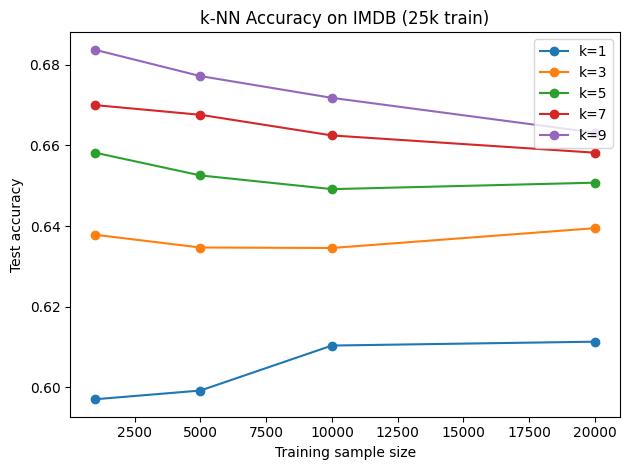

In [6]:
plt.figure()
for k in k_values:
    grp = df[df['k']==k].sort_values('sample_size')
    plt.plot(grp['sample_size'], grp['accuracy'], marker='o', label=f'k={k}')

plt.xlabel('Training sample size')
plt.ylabel('Test accuracy')
plt.title('k-NN Accuracy on IMDB (25k train)')
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
# here “full” refers to the largest sample we tried (20k)
full_df  = df[df['sample_size']==20000]
best_row = full_df.loc[full_df['accuracy'].idxmax()]
print(f"Optimal k = {best_row['k']} (accuracy = {best_row['accuracy']:.4f})")

Optimal k = 9.0 (accuracy = 0.6632)


In [ ]:
sample_sizes = [1000, 5000, 10000, 20000]
k_values     = [1, 3, 5, 7, 9]

# collect both train & test scores
results_tt = []
for size in sample_sizes:
    print(f"→ sampling {size} training examples…")  # see each size as it runs
    idx   = random.sample(range(X_train.shape[0]), size)
    X_sub = X_train[idx]
    y_sub = [train_labels[i] for i in idx]

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_sub, y_sub)
        train_acc = accuracy_score(y_sub,       knn.predict(X_sub))
        test_acc  = accuracy_score(test_labels, knn.predict(X_test))

        results_tt.append({
            'sample_size':    size,
            'k':              k,
            'train_accuracy': train_acc,
            'test_accuracy':  test_acc
        })

# build DataFrame and sanity-check the sizes you got
df_tt = pd.DataFrame(results_tt)
print("\nSample sizes actually in df_tt:", sorted(df_tt['sample_size'].unique()))

pivot = df_tt.pivot(index='sample_size',
                    columns='k',
                    values=['train_accuracy','test_accuracy'])
display(pivot)


# Plot
plt.figure(figsize=(8,5))
for k in k_values:
    grp = df_tt[df_tt['k']==k].sort_values('sample_size')
    plt.plot(grp['sample_size'], grp['train_accuracy'],
             marker='o', linestyle='-',  label=f'train, k={k}')
    plt.plot(grp['sample_size'], grp['test_accuracy'],
             marker='s', linestyle='--', label=f'test,  k={k}')

plt.xlabel('Training sample size')
plt.ylabel('Accuracy')
plt.title('k-NN Training vs. Testing on IMDB')
plt.xticks(sample_sizes)
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


→ sampling 1000 training examples…
→ sampling 5000 training examples…
→ sampling 10000 training examples…
→ sampling 20000 training examples…
